# Practica 02: Agrupaciones

Para ir ejecutando el cuaderno python usamos Shift+Intro.  

In [2]:
# Esto se emplea para que la salida se adapte al formato del notebook 
%matplotlib notebook
# A continuación importamos librerías necesarias  
import numpy as np  # cálculo numérico
import matplotlib.pyplot as plt  # gráficos 
from matplotlib import cm

## Campo lejano para el cálculo de interferencia de fuentes isotrópicas

La aproximación de campo lejano es razonable. Para hacernos una idea
vamos a calcular una diferencia de caminos de forma exacta y con la
aproximación de campo lejano. Fijémonos en el orden del error respecto
a la longitud de onda.

In [3]:
def respuesta_01():
    # Esta función debe devolver la diferencia de caminos entre dos ondas escalares
    # de longitud de onda 3 metros para llegar desde su origen hasta un punto de observación dado.
    #
    # 1) una fuente puntual en (x=0,y=0,z=0)
    # 2) otra fuente puntual en (x=3,y=1,z=2). 
    # El punto de observación es (x=150,y=100,z=200)
    # Calcular la diferencia de caminos longitud_camino_1-longitud_camino_2 
    # sin usar la aproximación de campo lejano y
    # después usando la aproximación de campo lejano.
    # Edita a partir de aquí
    
    a = np.array([0, 0, 0])
    b = np.array([3, 1, 2])
    ob = np.array([150, 100, 200])
    
    r1 = ob - a
    r2 = ob - b

    diferencia_caminos_sin_aproximar=np.linalg.norm(r1) - np.linalg.norm(r2) 
    
        
    # Calculamos la norma del vector ob
    # Dividimos cada componente entre la norma para normalizar
    r1_normalizado = r1/ np.linalg.norm(r1)
    
    
    diferencia_de_caminos_en_campo_lejano=np.linalg.norm(r1) - np.dot(r1_normalizado, r2)
    return(diferencia_caminos_sin_aproximar, diferencia_de_caminos_en_campo_lejano)

respuesta_01()

(3.5252917033826066, 3.52821142536402)

## Factor de agrupación (FA) de dos fuentes puntuales

El factor de agrupación nos permite resolver en dos partes el problema
de una agrupación de antenas.  Por el principio de multiplicación de
diagramas, por un lado se puede resolver el campo creado por un
elemento de la agrupación centrado en el origen y por otro el factor
de agrupación. El campo del elemento en el origen es el término que
contiene el caracter vectorial y la atenuación con la distancia para
conservar la energía. El factor de agrupación nos da el diagrama
direccional de interferencia, usando las diferencias de caminos y los
fasores de las corrientes de alimentación. Las posiciones de los
centros de fase de cada antena de la agrupación, determinan esas
diferencias de camino. La diferencias de camino, junto con los
desfases temporales dan lugar a la fase de la señal observada mediante
superposición de fasores.

In [4]:
def respuesta_02():
    # Calcular el factor de agrupación asociado a las dos fuentes puntuales
    # anteriores evaluado en la dirección del punto de observación del
    # problema anterior. Ahora las fuentes están en oposición de fase y la fuente
    # fuera del origen oscila con el doble de amplitud.  Asumimos campo lejano.
    # El fasor de las oscilaciones en el origen es 1.
    # Edita a partir de aquí    
    diferencia_de_caminos=respuesta_01()[1]
            
    a = np.array([0, 0, 0])
    b = np.array([3, 1, 2])
    ob = np.array([150, 100, 200])
    
    r1 = ob - a
    r2 = ob - b
    r1_norm = r1/ np.linalg.norm(r1)
    r2_norm = r2/np.linalg.norm(r2)
    
    lambda_1 = 3

    
    # calculamos la frecuencia espacial analogica
    k = 2*np.pi/lambda_1
    # sabemos que el periodo de muestreo es 1
    d = 1
    # Hallamos la frecuencia digital, sabiendo que están en oposición de fase
    frec_digital = k*d*np.cos(2*np.pi)
    
    # Calculamos las diferencias de fase debido a las diferencias de camino
    fase1 = 0
    fase2 = k*diferencia_de_caminos
    
    # Calculamos el fasor de cada fuente
    fasor1 =  1*np.exp(1j*fase1)
    desfase = np.pi  # sabemos que están en oposición de fase
    fasor2 = 2*np.exp(1j*(fase2 + desfase))  # el coeficiente de la serie de fourier a1 = 2
    
    FA = fasor1 + fasor2
    
    modulo_FA = np.abs(FA)    

    return(FA)    

respuesta_02()

(0.10402525642077654-1.7880797685976273j)

## Agrupación lineal transversal

Gracias a la aproximación de campo lejano, podemos emplear la
Transformada de Fourier (TF) para calcular el factor de agrupación (FA)
como una TF discreta de la secuencia de coeficientes.

<IPython.core.display.Javascript object>


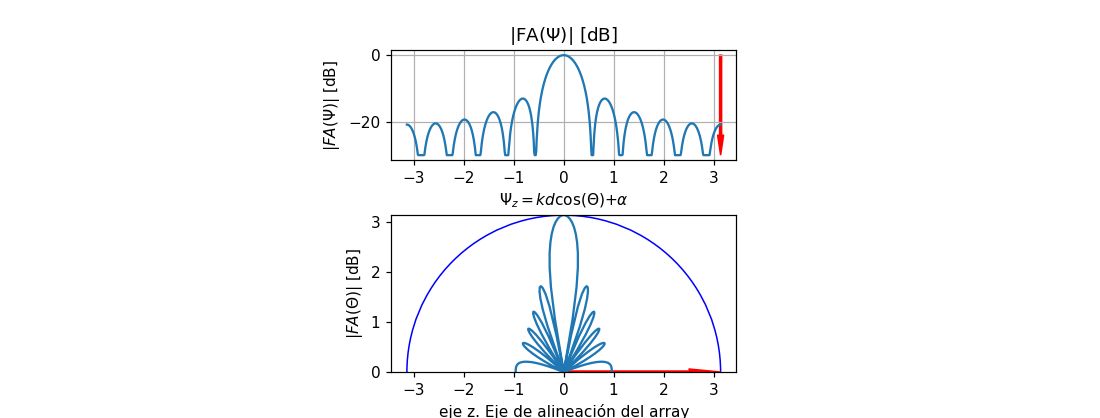

interactive(children=(FloatSlider(value=0.0, description='$\\Psi_z=>\\Theta$', max=180.0, step=0.01), Output()…

In [5]:
def respuesta_03():
    # Consideramos una agrupación de 11 antenas isotrópicas
    # Es una agrupación uniforme: las 11 antenas están alimentadas
    # por corrientes de la misma amplitud y fase.
    # Los centros de fase de los elementos de la agrupación están
    # alineados en el eje z.
    # La distancia de separación entre las antenas es de media
    # longitud de onda (d=λ/2).
    # Valor del FA en Ψ=0 es 1.
    # Fase progresiva nula (α=0)
    # Esta función debe devolver una lista con dos elementos:
    # El primero será valor absoluto del factor de agrupación en
    # función de Ψ, es decir |FA(Ψ)|.
    # El segundo una  lista con otros dos elementos: los extremos
    # del margen visible es decir los extremos del intervalo de
    # Ψ que se corresponden con direcciones del espacio real.
    # Observa en el gráfico generado abajo, la relación uno a uno
    # entre Ψ y θ.
    # Edita a partir de aquí
        
    N = 11
    kd = np.pi
    # Definimos una función para hallar el sumatorio y normalizamos
    def FA(Ψ):
        sumatorio = 1/N*sum([np.exp(1j*n*Ψ) for n in range(11)]) 
        return np.abs(sumatorio)

    margen_visible=[-kd, kd]
    return [FA,margen_visible]

from ftrlearn02 import muestra_FA
muestra_FA(respuesta_03()[0],respuesta_03()[1],'|FA($\Psi$)| [dB]')


## Agrupación uniforme con análisis de fase progresiva

Vamos a analizar ahora la importancia de las diferencias de fase en la
alimentación de los elementos de la agrupación. Veamos cómo los
desfases temporales progresivos producen desplazamientos en frecuencia
espacial.  Como la frecuencia espacial está ligada a direcciones de
observación, se produce una rotación del diagrama. Es decir una
rotación en el patrón del reparto espacial de energía.

<IPython.core.display.Javascript object>


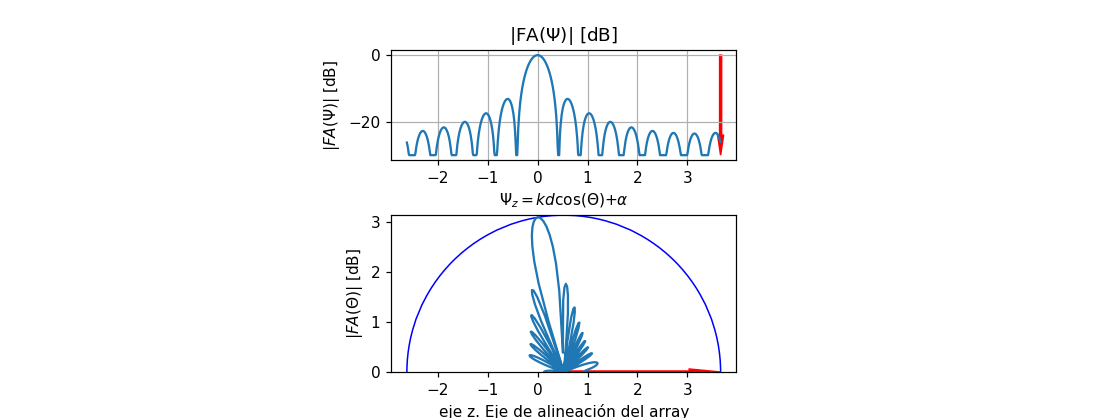

interactive(children=(FloatSlider(value=0.0, description='$\\Psi_z=>\\Theta$', max=180.0, step=0.01), Output()…

99.59406822686046

In [6]:
def respuesta_04():
    # Consideramos una agrupación de 15 antenas isotrópicas 
    # Los centros de fase de los elementos de la agrupación están 
    # alineados en el eje z. La distancia de separación entre las 
    # antenas es de media longitud de onda (d=λ/2). La fase 
    # progresiva α es de 30 grados. La escala del FA es tal 
    # que FA(Ψ=0)=1.
    #
    # Esta función debe devolver una lista con tres elementos:
    # - el primero el valor del módulo del factor de agrupación en 
    #   función de psi: |FA(Ψ)|
    # - el segundo una lista con otros dos elementos: los extremos 
    #   del margen visible.
    # - el tercero el valor θ expresado en grados en el que se 
    # alcanza el máximo de radiación (chequea a ojo si se corresponde 
    # con ayuda de la gráfica)
    # Edita a partir de aquí
   
    N = 15 
    kd = np.pi
    α = np.pi/6
    
    FA = lambda Ψ: abs(1/N*(np.sin(N * (Ψ / 2)) / np.sin(Ψ / 2))) if Ψ != 0 else 1
    FA = np.vectorize(FA)

    margen_visible=[-kd+α,+kd+α]
    
    theta_max = 90 +(np.arcsin(α/np.pi)*180)/np.pi
    
    return [FA,margen_visible,theta_max]


muestra_FA(respuesta_04()[0],respuesta_04()[1],'|FA($\Psi$)| [dB]')
respuesta_04()[2] #imprime el theta_max

## Agrupación uniforme con cálculo de fase progresiva

<IPython.core.display.Javascript object>


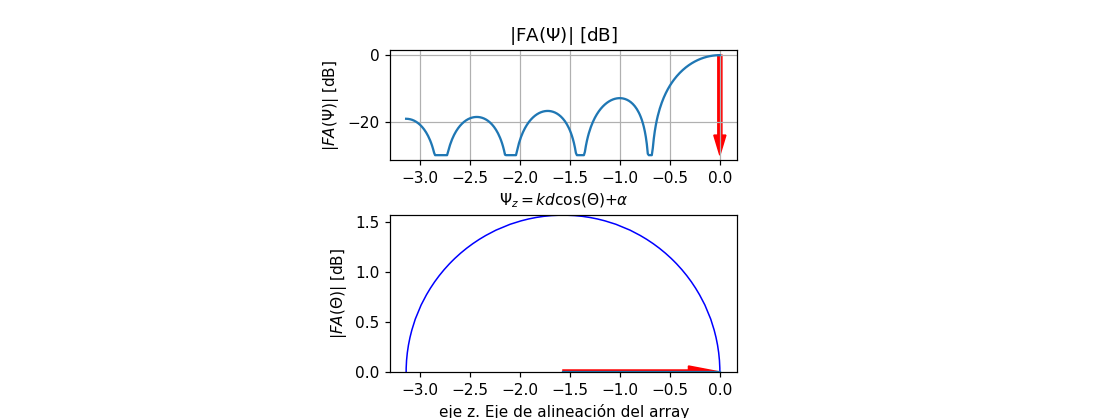

interactive(children=(FloatSlider(value=0.0, description='$\\Psi_z=>\\Theta$', max=180.0, step=0.01), Output()…

-1.5707963267948966

In [19]:
def respuesta_05():
    # Consideramos una agrupación de 9 antenas isotrópicas 
    # Los centros de fase de los elementos de la agrupación están 
    # alineados en el eje z. La distancia de separación entre las 
    # antenas es 0,25 longitudes de onda (d=λ/4).
    # Calcular la fase progresiva para que el máximo de radiación 
    # esté en theta=0 grados, apuntando al semieje z positivo.
    # La escala del FA es tal que FA(Ψ=0)=1
    # Esta función debe devolver una lista con tres elementos:
    # - el primero el valor del módulo del factor de agrupación en 
    #   función de psi 
    # - el segundo una lista con otros dos elementos: los extremos 
    #   del margen visible.
    # - el tercero el valor alpha expresado en radianes que orienta 
    #   el máximo en la dirección theta=0 grados 
    # (chequea a ojo si se corresponde con ayuda de la gráfica)
    # Edita a partir de aquí
    
    N = 9
    kd = np.pi/2
    alpha = -kd * np.cos(0)
    
    # El limite de sin(x)/x cuando x->0 es 1, por lo que si Ψ = 0, FA = N/N = 1
    FA = lambda Ψ: 1/N * abs(np.sin(N*Ψ/2) / np.sin(Ψ/2)) if Ψ != 0 else 1
    FA = np.vectorize(FA)  # Vectorizamos el FA
    
    margen_visible=[-kd+alpha, kd+alpha]
    
    return [FA,margen_visible,alpha]

muestra_FA(respuesta_05()[0],respuesta_05()[1],'|FA($\Psi$)| [dB]')
respuesta_05()[2] # imprime el alpha

Necesitamos aprender a representar superficies con matplotlib. El
proceso es similar en matlab.

- Una superficie z=f(x,y) se puede aproximar mediante parches
  rectangulares.
- Cada uno de esos parches vendrá determinado por las coordenadas de
  sus cuatro esquinas.
- Cada esquina se representaría como un punto en 3D: (x,y,f(x,y)).
- Imaginemos que queremos representar la superficie formada por 6
  parches contiguos: dos filas con tres columnas de parches cada una.
- Primero necesitamos encontrar las coordenadas de las esquinas de
  cada parche.
- Como los parches son contiguos hay muchas esquinas que forman parte
  de varios parches.
- No tiene sentido repetir varias veces las coordenadas de la misma
  esquina.
- La idea es indicar a qué parche pertenece cada esquina de
  coordenadas (x,y) utilizando una matriz.
- La posición en la matriz indíca los parches a los que pertenece. Por
  ejemplo

<img src="figuras/meshgrid-example.png" alt="ejemplo meshgrid" class="bg-primary mb-1" width="500px">

- En el gráfico de arriba, las coordenadas (x,y)=(1,7) representan la
  esquina superior izquierda del parche superior izquierdo.
- Las coordenadas (2,7), (1,6) y (2,6) son el resto de esquinas de
  este primer parche.
- El segundo parche de la primera fila comparte dos esquinas con el
  parche anterior: (2,7) y (2,6). Además tiene otras dos equinas
  nuevas (3,7) y (3,6)
- De modo que la posición en la matriz determina cuáles son las
  coordenadas (x,y) de las esquinas de cada uno de los seis parches.

<IPython.core.display.Javascript object>


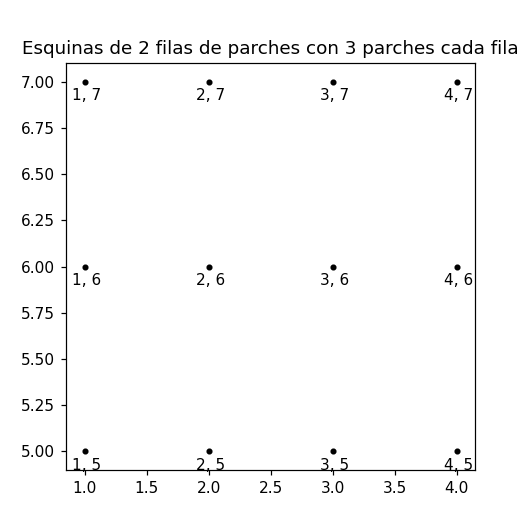

In [8]:
def muestra_meshgrid():
    # Instanciamos la figura
    fig = plt.figure(figsize=plt.figaspect(1))
    # Defino las coordenadas x de las esquinas de los parches
    x = np.array([1, 2, 3, 4])
    # Defino las coordenadas y de las esquinas de los parches
    y = np.array([5, 6, 7])
    # Creo la malla de coordenadas con las esquinas de los parches
    XX, YY = np.meshgrid(x, y)
    # Dibujo un punto en cada esquina de los parches
    plt.plot(XX, YY, marker='.', color='k', linestyle='none')
    # Etiqueto los puntos
    for i in x:
        for j in y:
            plt.text(i-0.1, j-0.1, '%d, %d' % (int(i), int(j))) #, transform=trans_offset)
    
    ax=fig.gca()
    ax.set_title("Esquinas de 2 filas de parches con 3 parches cada fila")            
    
    plt.show()

muestra_meshgrid()

Para representar la función z=f(x,y)=x empleamos la malla que hemos creado en en plano xy:

<IPython.core.display.Javascript object>


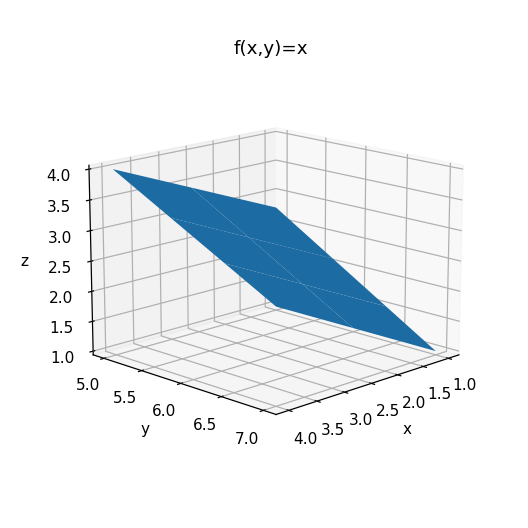

In [9]:
def muestra_superficie_con_meshgrid():
    fig = plt.figure(figsize=plt.figaspect(1))
    ax = fig.add_subplot(111, projection='3d')   
    # Defino las coordenadas x de las esquinas de los parches
    x = np.array([1, 2, 3, 4])
    # Defino las coordenadas y de las esquinas de los parches
    y = np.array([5, 6, 7])
    # Creo la malla de coordenadas con las esquinas de los parches
    XX, YY = np.meshgrid(x, y)
    # Esta función crea los parches identificando las esquinas comunes de forma automática
    ax.plot_surface(XX, YY, XX)
    # Etiquetamos los ejes
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    # Damos título a la gráfica
    ax.set_title('f(x,y)=x')
    # Seleccionamos un punto de vista inicial
    ax.view_init(15,45)
    # Mostramos la gráfica
    plt.show()
    
muestra_superficie_con_meshgrid()

Vemos los 6 parches con las esquinas definidas por la malla de puntos
que vimos antes. La altura de cada punto la hemos fijado en este
ejemplo al valor de la coordenada x de la malla, pero con mayor
generalidad pordemos dar a cada esquina del parche la altura que
queramos en función de sus cordenadas (x,y)

## Representación del FA 2D en cartesianas

Ahora nuestro objetivo es representar la transformada bidimensional de
los coeficientes de alimentación de una agrupación plana.

<IPython.core.display.Javascript object>


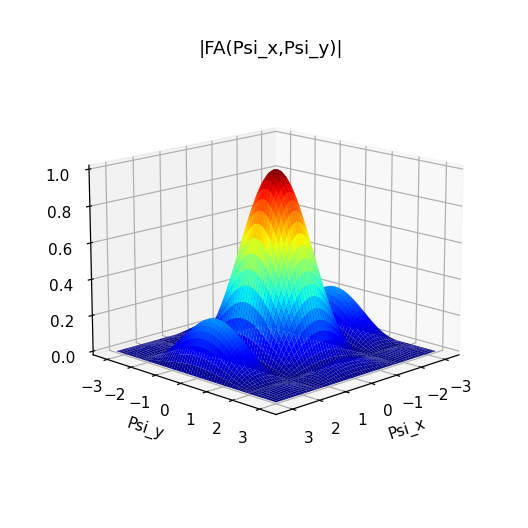

In [14]:
def respuesta_06():
    # Esta función debe devolver tres matrices para representar 
    # un Factor de Agrupación en módulo: |FA(Ψ_x,Ψ_y)|
    # PSI_y es la matriz de coordenadas Ψ_y de la malla de 
    # evaluación, queremos mostrar un periodo en ese eje, en 
    # intervalo simétrico respecto al origen, con 64 segmentos.
    # PSI_x es la matriz de coordenadas Ψ_x de la malla de 
    # evaluación, queremos mostrar un periodo en ese eje, en 
    # intervalo simétrico respecto al origen, con 64 segmentos
    # FA es la matriz de valores del Factor de agrupación 
    # correspondientes a la malla de evaluación (64x64 parches)
    # Se trata de una agrupación uniforme en x, triangular en y. 
    # Formada por una matriz cuadrada de 4 elementos de lado 
    # (16 antenas). Está normalizada en el origen vale 1.
    # Edita a partir de aquí
    
    
    N = 4
    kd_x = np.pi
    kd_y = np.pi
    
    # x se define en un intervalo equivalente al margen visible, habiendo en total 64 parches
    x = np.linspace(-kd_x, +kd_x, 65)
    y = np.linspace(-kd_y, +kd_y, 65)
    
    Ψ_x, Ψ_y = np.meshgrid(x,y)
    
    # Calculamos el FA con esta fórmula en vez de con la división de senos para evitar indeterminaciones
    FA = np.abs(
    sum([np.exp(1j*n*Ψ_x) for n in range(N)])*(
    1+
    +2*np.exp(1j*Ψ_y)
    +2*np.exp(2j*Ψ_y)
    +1*np.exp(3j*Ψ_y)
    )
    )/(N**2)
    FA = FA / np.max(FA)

    
    return([Ψ_x, Ψ_y, FA])
    
def muestra_FA_cartesianas(XX, YY, ZZ, titulo):
    fig = plt.figure(figsize=plt.figaspect(1))
    ax = fig.add_subplot(111, projection='3d')   

    # Esta función crea los parches identificando las esquinas comunes de forma automática
    ax.plot_surface(XX, YY, ZZ, alpha=1,rstride=1, cstride=1,cmap=cm.jet)
    # Etiquetamos los ejes
    ax.set_xlabel('Ψ_x')
    ax.set_ylabel('Ψ_y')
    #ax.set_zlabel('|FA(Ψ_x,Ψ_y)|')
    # Damos título a la gráfica
    ax.set_title(titulo)
    # Seleccionamos un punto de vista inicial
    ax.view_init(15,45)
    # Mostramos la gráfica
    plt.show()
    

from ftrlearn02 import muestra_FA_cartesianas   
muestra_FA_cartesianas(respuesta_06()[0],respuesta_06()[1],respuesta_06()[2],'|FA(Psi_x,Psi_y)|')

## Representación del FA 2D en unidades logarítmicas

<IPython.core.display.Javascript object>


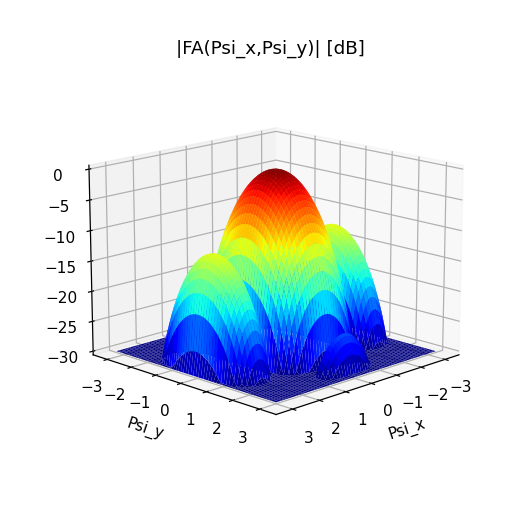

In [15]:
def respuesta_07():
    # Esta función debe devolver tres matrices para representar 
    # un Factor de Agrupación en módulo: |FA(Ψ_x,Ψ_y)| de la 
    # respuesta anterior, pero el eje vertical ahora tiene estar
    # expresado en dB relativos respecto al máximo principal,
    # que debe valer 0 dB.
    # En la gráfica se mostrarán valores hasta -30 dB todos los 
    # valores inferiores se sustituirán por -30 dB
    # Podemos comprobar que se aprecian mejor los lóbulos secundarios
    # Edita a partir de aquí
    
    PSI_x,PSI_y,FA = respuesta_06()
    
    # Convertimos la escala a logarítmica. Normalizamos respecto al máximo
    FA_log = 20*np.log10(FA/np.max(FA))
    
    # Los valores de FA inferiores a -30dB serán -30dB
    FA_log[FA_log<-30] = -30

    return([PSI_x,PSI_y,FA_log])

muestra_FA_cartesianas(respuesta_07()[0],respuesta_07()[1],respuesta_07()[2],'|FA(Psi_x,Psi_y)| [dB]')

## Principio de multiplicación de diagramas

El principio de multiplicación de diagramas nos permite resolver por
separado el diagrama de radiación de un elemento del array y luego
conseguir el diagrama de la agrupación multiplicando por el factor de la
agrupación
-

In [21]:
def respuesta_08():
    # Agrupación uniforme
    # Centros de fase en el eje Z.
    # La distancia de separación entre las antenas es de media 
    # longitud de onda (d=λ/4)
    # Fase progresiva nula.
    # Se usan 3 antenas de hilo iguales entre sí. 
    # Cada una de ellas tiene un campo radiado ∣E∣^2=|sin(θ)|^2 
    # cuando están paralelas al eje z, como es el caso.
    # La función devuelve el diagrama de radiación t(θ,φ) de 
    # densidad de potencia normalizado de la agrupación en 
    # unidades naturales
    # Edita a partir de aquí
    
    N = 3
    kd = np.pi / 2
    
    FA = lambda θ,φ: np.abs(np.sin(θ))**2 * np.abs(sum([np.exp(1j*n*kd*np.cos(θ)) for n in range (N)])/N)**2
    
    return FA

## El FA 2D en el espacio real

Las agrupaciones planas son una extensión de las agrupaciones
unidimensionales. En muchas ocasiones se puede estudiar una agrupación
plana como la convolución de dos agrupaciones lineales.

<IPython.core.display.Javascript object>


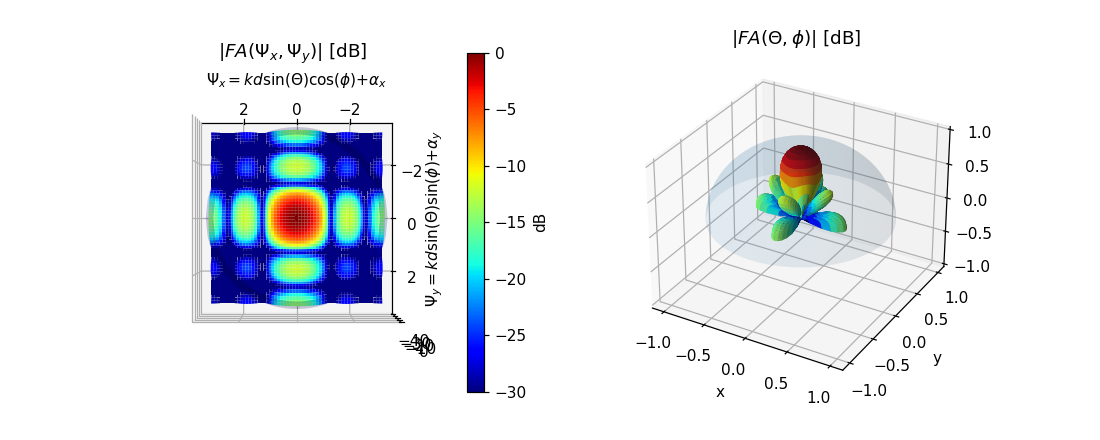

In [12]:
def respuesta_09():
    # Se considera:
    # Una agrupación de antenas isotrópicas sobre el plano XY
    # Repartidas en los nodos de una malla cuadrada de 5x5 elementos.
    # La separación entre elementos es de media longitud de onda en 
    # la dirección X, también en la dirección Y
    # Alimentación uniforme
    # En el origen el FA(Ψx=0,Ψy=0)=1
    # Diagrama de radiación en el espacio real con el lóbulo principal 
    # apuntando en la dirección (θ=0)
    # La función devuelve tres cosas:
    # - Factor de agrupación en módulo en función de los ángulos 
    #   eléctricos ∣FA(Ψx,Ψy)∣
    # - Margen visible en Ψx
    # - Margen visible en Ψy
    # Edita a partir de aquí
   
    N = 5
    kd_x = np.pi
    kd_y = np.pi
    
    margen_visible_Ψx = [-kd_x,kd_x]
    margen_visible_Ψy = [-kd_y,kd_y]
    
    FA = lambda Ψx,Ψy: abs(
    1/N**2 *
    np.sin(N*Ψx/2) / np.sin(Ψx/2) *
    np.sin(N*Ψy/2) / np.sin(Ψy/2)    
    )
    
    return[FA,margen_visible_Ψx,margen_visible_Ψy]

from ftrlearn02 import muestra_FA_2D
muestra_FA_2D(respuesta_09()[0],respuesta_09()[1],respuesta_09()[2],'|FA($\Psi$)| [dB]')

## FA en 2D orientar el lóbulo principal

Lo dicho antes para los desplazamientos de frecuencia espaciales se
puede aplicar también aquí. Simplemente es una generalización a dos
dimensiones.

<IPython.core.display.Javascript object>


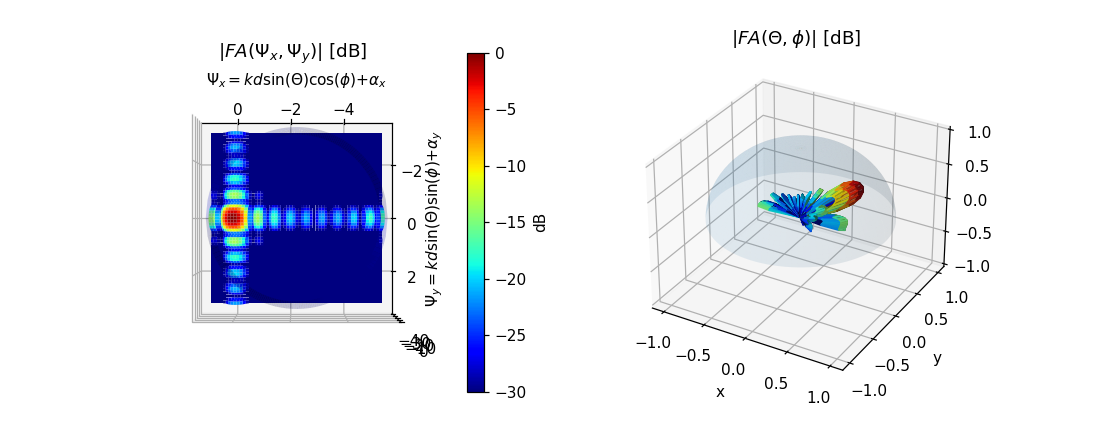

In [13]:
def respuesta_10():
    # Se considera:
    # Una agrupación de antenas isotrópicas sobre el plano XY
    # Repartidas en los nodos de una malla cuadrada de 11x11 elementos.
    # La separación entre elementos es de media longitud de onda en 
    # la dirección X, también en la dirección Y
    # Alimentación uniforme
    # En el origen el FA(Ψx=0,Ψy=0)=1
    # Diagrama de radiación en el espacio real con el lóbulo 
    # principal apuntando en la dirección (θ=45,φ=0)
    # Bajo las condiciones previas, la función debe devolver 3 cosas:
    # - Factor de agrupación en módulo en función de los ángulos 
    #   eléctricos ∣FA(Ψx,Ψy)∣
    # - Margen visible en Ψx
    # - Margen visible en Ψy
    # Edita a partir de aquí
    
    N = 11
    kd_x = np.pi
    kd_y = np.pi
    θ = np.pi/4
    φ = 0
    α_x = -kd_x * np.sin(θ) * np.cos(φ)
    α_y = -kd_y * np.sin(θ) * np.sin(φ)
    
    margen_visible_Ψx = [-kd_x + α_x, kd_x + α_x]
    margen_visible_Ψy = [-kd_y + α_y, kd_y + α_y]
    
    FA = lambda Ψx,Ψy: abs(
    1/N**2 *
    np.sin(N*Ψx/2) / np.sin(Ψx/2) *
    np.sin(N*Ψy/2) / np.sin(Ψy/2)    
    )

    return[FA,margen_visible_Ψx,margen_visible_Ψy]

muestra_FA_2D(respuesta_10()[0],respuesta_10()[1],respuesta_10()[2],'|FA($\\Psi$)| [dB]')